# Cuaderno De EDA. Entrenamiento
___

**Autor:**
- Guilegar Mambuscay Orozco

**Universidad Libre Cali - Julio 2023**

___

# 1. Cargando Datos al Sistema.

#### Columnas de Datos.

## 1.1 Librerias para el Analisis de Datos.

In [17]:
# Descripción de Librerias
import pandas as pd
import numpy as np
import os
from os import remove
from os import path
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.metrics 
from sklearn.metrics import confusion_matrix
#from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

In [18]:
# CWD = Current Working Directory
cwd = os.getcwd()
cwd


'C:\\Users\\anderson.rodriguez\\Proyecto_Diplomado\\src'

In [21]:
processed_dir = cwd + "/../Datos/processed/"
final_dir = cwd + "/../Datos/Final/"

In [22]:
#Cargamos los datos de entrada
data = pd.read_csv(final_dir + 'final_Datos.csv', sep=',')
#Visualizar cuantas dimensiones y registros tiene
data.shape

(29143, 7)

# 2. Exploración de Datos.
___
Procederemos a realizar una visualización previa a los datos importados tras la limpieza. Evidenciaremos la cabecera del archivo y la estructura del mismo.


In [23]:
# Se valida que los datos contengan información
data.head()

,FECHA_VENTA,DIA_COMERCIAL,CIUDAD,DEPARTAMENTO,TIPO,MARCA,VALOR_TOTAL
0,2021-06-01,1,VERGARA,CUNDINAMARCA,TELEFONO,MOTOROLA,688520.0
1,2021-06-02,0,POPAYAN,CAUCA,TELEFONO,SAMSUNG,1359570.0
2,2021-06-02,0,LA MACARENA,META,TELEFONO,SAMSUNG,795520.0
3,2021-06-01,1,DURANIA,NORTE DE SANTANDER,TELEFONO,MOTOROLA,768520.0
4,2021-06-01,1,YARUMAL,ANTIOQUIA,TELEFONO,MOTOROLA,768520.0


In [24]:
# Se procede a validar las columnas de los datos
data.columns

Index(['FECHA_VENTA', 'DIA_COMERCIAL', 'CIUDAD', 'DEPARTAMENTO', 'TIPO',
       'MARCA', 'VALOR_TOTAL'],
      dtype='object')

In [25]:
# Se valida la estructura de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29143 entries, 0 to 29142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FECHA_VENTA    29143 non-null  object 
 1   DIA_COMERCIAL  29143 non-null  int64  
 2   CIUDAD         29143 non-null  object 
 3   DEPARTAMENTO   29143 non-null  object 
 4   TIPO           29143 non-null  object 
 5   MARCA          29143 non-null  object 
 6   VALOR_TOTAL    29143 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.6+ MB


#### Una vez evidenciada la estructura de los datos procedermos a validar los datos. Se visualiza la Forma y Resumen de los mismos.

In [26]:
# Evidenciamos la forma de los datos, cantidad de registros y cuantas columnas.
data.shape

(29143, 7)

In [27]:
# Se realiza el uso de la funcion .describe() para obtener el resumen Estadistico de los datos.
data.describe()

,DIA_COMERCIAL,VALOR_TOTAL
count,29143.000000,2.914300e+04
mean,0.270013,1.157458e+06
std,0.443974,8.983643e+05
min,0.000000,0.000000e+00
25%,0.000000,7.195200e+05
50%,0.000000,7.955200e+05
75%,1.000000,1.263521e+06
max,1.000000,9.308580e+06


### 2.1 Entendiendo el comportamiento de los datos de acuerdo con el objetivo.
___
Lo que se busca es "Predecir cual es el tipo y marca de producto que mas se venderia en una fecha comercial en colombia a nivel pais, departamento o ciudad, basado en las ventas realizadas de los ultimos 3 años por el call center de Tecnologia". Para ello mediante graficos validaremos el comportamiento de las ventas en dichas fechas.

#### 2.1.2 Grafico de Barras: Ventas divido de acuerdo al dia comercial.
___
El siguiente gráfico permite establecer la cantidad de ventas que se realizaron en los dias comerciales coincidentes. De esta forma, se puede evidenciar el comportamiento de las ventas pasadas y tratar de predecir el comportamiento futuro.

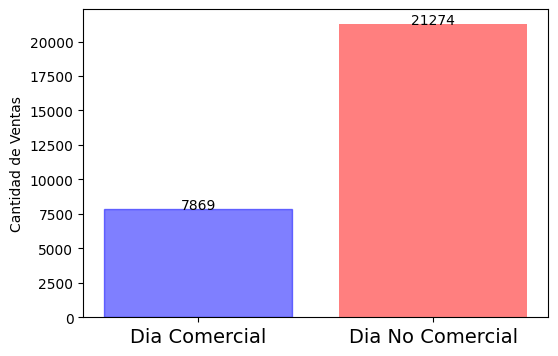

In [28]:
# Grafico de Columnas que imprime las ventas de acuerdo a los dias comerciales.

tam = [data.DIA_COMERCIAL[data['DIA_COMERCIAL']==1].count(), data.DIA_COMERCIAL[data['DIA_COMERCIAL']==0].count()]
x = ['Dia Comercial','Dia No Comercial']
pos = np.arange(len(x))
tam, x

fig, ax = plt.subplots(figsize=(6, 4))
barras = plt.bar(pos, tam, align='center',color='Red', alpha=0.5)
barras[0].set_color('Blue')
barras[0].set_color('Blue')
plt.xticks(pos, x, fontsize=14)
plt.ylabel('Cantidad de Ventas')
for barra in barras:
  # letrero del Valor
  altura = barra.get_height()
  x = barra.get_x() + barra.get_width()/2
  plt.gca().text(x, altura-6, f"{altura}", ha='center', fontsize=10)

#### 2.1.2 Grafico de Torta: Porcentaje de Ventas de acuerdo al dia comercial.
___
El siguiente gráfico permite establecer la diferencia Porcentual de ventas basados en los dias comerciales.

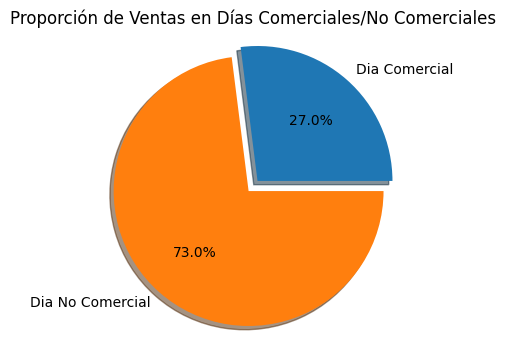

In [29]:
labels = 'Dia Comercial', 'Dia No Comercial'
tam = [data.DIA_COMERCIAL[data['DIA_COMERCIAL']==1].count(), data.DIA_COMERCIAL[data['DIA_COMERCIAL']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(tam, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')
plt.title("Proporción de Ventas en Días Comerciales/No Comerciales", size = 12)
plt.show()

#### 2.1.3 Grafico de Barras: Total Marca y Tipo de dispositivos vendidos.
___
Las siguientes 2 gráficas permiten establecer la el total de dispositivos vendidos por Marca y Tipo de Dispositivo.

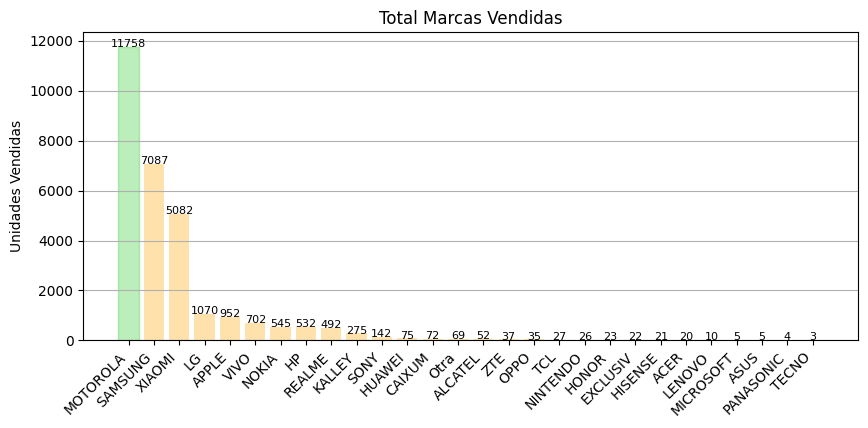

In [30]:
# Gráfico de barras para el total de marcas.
pos = np.arange(len(data['MARCA'].unique()))
cantidad = data['MARCA'].value_counts()
fig = plt.figure(figsize=(10, 4))
marcas = data['MARCA'].unique()

barras = plt.bar(pos, cantidad, color='orange', alpha=0.33)

barras[0].set_color('LimeGreen')

for barra in barras:
  altura = barra.get_height()
  x = barra.get_x() + barra.get_width()/2
  plt.gca().text(x, altura-5, f"{altura:0.0f}", ha='center', fontsize=8)

plt.xticks(pos, marcas, rotation=45, ha='right', fontsize=10)
plt.title('Total Marcas Vendidas')
plt.ylabel('Unidades Vendidas')

plt.grid(axis='y')
plt.show()

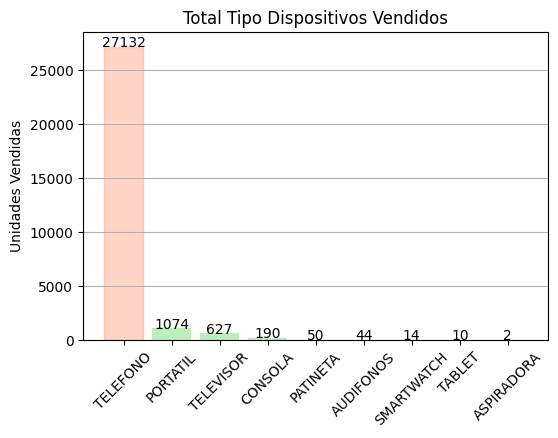

In [31]:
# Gráfico de barras para el total de Tipo.
pos = np.arange(len(data['TIPO'].unique()))
cantidad = data['TIPO'].value_counts()
fig = plt.figure(figsize=(6, 4))
tipos = data['TIPO'].unique()

barras = plt.bar(pos, cantidad, color='LimeGreen', alpha=0.33)

barras[0].set_color('Coral')

for barra in barras:
  altura = barra.get_height()
  x = barra.get_x() + barra.get_width()/2
  plt.gca().text(x, altura-5, f"{altura:0.0f}", ha='center', fontsize=10)

plt.xticks(pos, tipos, rotation=45, fontsize=10)
plt.title('Total Tipo Dispositivos Vendidos')
plt.ylabel('Unidades Vendidas')

plt.grid(axis='y')
plt.show()

#### 2.1.4 Grafico de Barras Horizontal: Visualiza el valor total de ventas por departamento.
___
Este gráfico permite evidenciar todas las ventas acumuladas por cada departamento en el historico de ventas.

In [32]:
# Se crea un Data Frame (df_dep_ven) para agrupar por departamento la suma total de las ventas.
df_dep_ven = data.groupby(['DEPARTAMENTO'], as_index=False)[['VALOR_TOTAL']].sum().sort_values(by='DEPARTAMENTO', ascending=True)
df_dep_ven['VALOR_TOTAL'] = df_dep_ven['VALOR_TOTAL'] /1000
df_dep_ven

,DEPARTAMENTO,VALOR_TOTAL
0,AMAZONAS,3462.661
1,ANTIOQUIA,3932912.965
2,ARAUCA,258904.961
3,ATLANTICO,1265360.626
4,BOGOTA D.C.,7703662.735
5,BOLIVAR,985679.169
6,BOYACA,1023045.574
7,CALDAS,637807.176
8,CAQUETA,464008.749
9,CASANARE,580160.987


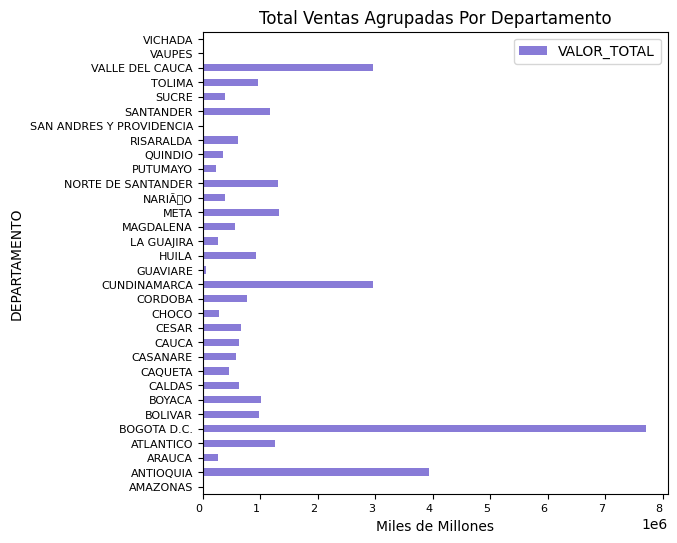

In [33]:
df_dep_ven.index = df_dep_ven['DEPARTAMENTO']
df_dep_ven.plot(kind='barh', figsize=(6, 6), color='slateblue', alpha=0.8, fontsize=8)
plt.title('Total Ventas Agrupadas Por Departamento')
plt.xlabel('Miles de Millones')
plt.xticks(rotation=0, ha='right');

# 3. Preparación de los Datos para el Algortimo de Entrenamiento.
___
Para proceder al entrenamiento de predicción se procedera a preparar los datos previamente. De tal forma que permitan al algoritmo arrojar los resultados esperados.


#### La matriz de Correlación de Variables Númericas.
___
Permite validar la correlación entre las variables númericas del sistema, como se puede observar las mismas no superan el 0.5 en las mismas.

<Axes: >

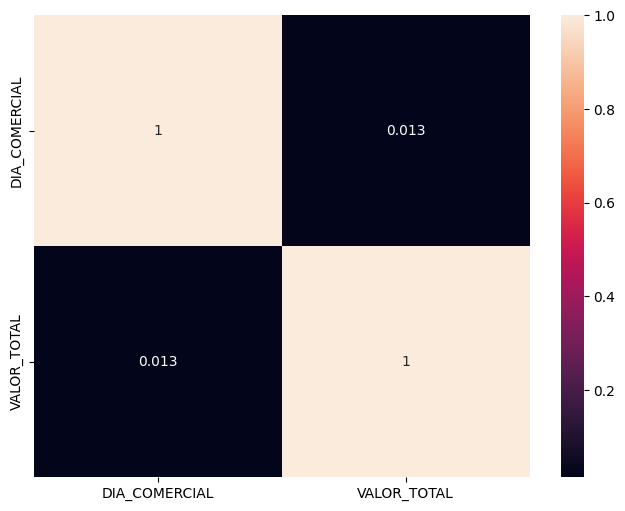

In [34]:
# GRafico de Correlación que permite establecer relación entre las variables númericas del sistema
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True)

### 3.1 Codificación de Datos.

Se convierten las variables categoricas en númericas mediante codificación ONE-HOT-ENCODING, para el valor unico en las columna de TIPO_PAGO.

In [35]:
# Imprimimos el Encabezado del Data Frame.
data.head()

,FECHA_VENTA,DIA_COMERCIAL,CIUDAD,DEPARTAMENTO,TIPO,MARCA,VALOR_TOTAL
0,2021-06-01,1,VERGARA,CUNDINAMARCA,TELEFONO,MOTOROLA,688520.0
1,2021-06-02,0,POPAYAN,CAUCA,TELEFONO,SAMSUNG,1359570.0
2,2021-06-02,0,LA MACARENA,META,TELEFONO,SAMSUNG,795520.0
3,2021-06-01,1,DURANIA,NORTE DE SANTANDER,TELEFONO,MOTOROLA,768520.0
4,2021-06-01,1,YARUMAL,ANTIOQUIA,TELEFONO,MOTOROLA,768520.0


#### Se procede a hacer uso de la codificación tras conocer el encabezado. Para ello se utilizarán Columnas DUMMY.

___
Se procede primero a codificar la fecha y dividir la misma en columnas de dia, mes, año para el entrenamiento.

In [36]:
# Función que permite crear las columnas de dia,mes,año
def funcion_fecha(x):
    
    año = x[0:4]
    mes = x[5:7]
    dia = x[8:10]
    return datetime.datetime(int(año), int(mes), int(dia))

data['FECHA_VENTA'] = data['FECHA_VENTA'].apply(lambda x : funcion_fecha(x))

In [37]:
# Se crea cada columna correspondiente a la fecha del registro
data['MES'] = data['FECHA_VENTA'].apply(lambda x: x.month)
data['AÑO'] = data['FECHA_VENTA'].apply(lambda x: x.year)
data['DIA'] = data['FECHA_VENTA'].apply(lambda x: x.day)
data['DIASEMANA'] = data['FECHA_VENTA'].apply(lambda x: x.weekday())
data = data.drop(columns ='FECHA_VENTA')
data

,DIA_COMERCIAL,CIUDAD,DEPARTAMENTO,TIPO,MARCA,VALOR_TOTAL,MES,AÑO,DIA,DIASEMANA
0,1,VERGARA,CUNDINAMARCA,TELEFONO,MOTOROLA,688520.0,6,2021,1,1
1,0,POPAYAN,CAUCA,TELEFONO,SAMSUNG,1359570.0,6,2021,2,2
2,0,LA MACARENA,META,TELEFONO,SAMSUNG,795520.0,6,2021,2,2
3,1,DURANIA,NORTE DE SANTANDER,TELEFONO,MOTOROLA,768520.0,6,2021,1,1
4,1,YARUMAL,ANTIOQUIA,TELEFONO,MOTOROLA,768520.0,6,2021,1,1
...,...,...,...,...,...,...,...,...,...,...
29138,0,SANTO TOMAS,ATLANTICO,TELEFONO,SAMSUNG,2250570.0,3,2023,31,4
29139,0,NUQUI,CHOCO,TELEFONO,MOTOROLA,657520.0,3,2023,31,4
29140,0,NEIVA,HUILA,TELEFONO,MOTOROLA,377520.0,3,2023,31,4
29141,0,CALI,VALLE DEL CAUCA,TELEFONO,HUAWEI,719520.0,3,2023,31,4


___
Una vez realizado el proceso, vamos a crear un DataFrame donde crearemos las columnas codificadas (dummy) para las columnas String: Ciudad, Departamento, Tipo, Tipo_Pago y Marca.

In [38]:
# Se realiza una copia del Dataframe Actual y se traslada al
# Data Frame df_dummy el cual almacenara los cambios de codificación.
df_dummy = data.copy()
df_dummy.head()

,DIA_COMERCIAL,CIUDAD,DEPARTAMENTO,TIPO,MARCA,VALOR_TOTAL,MES,AÑO,DIA,DIASEMANA
0,1,VERGARA,CUNDINAMARCA,TELEFONO,MOTOROLA,688520.0,6,2021,1,1
1,0,POPAYAN,CAUCA,TELEFONO,SAMSUNG,1359570.0,6,2021,2,2
2,0,LA MACARENA,META,TELEFONO,SAMSUNG,795520.0,6,2021,2,2
3,1,DURANIA,NORTE DE SANTANDER,TELEFONO,MOTOROLA,768520.0,6,2021,1,1
4,1,YARUMAL,ANTIOQUIA,TELEFONO,MOTOROLA,768520.0,6,2021,1,1


In [39]:
# Definimos una función que se encargará de codificar las columnas
def dummies(df_dummy):
    
  df_dummy = pd.get_dummies(df_dummy, columns=['CIUDAD'])
  df_dummy = pd.get_dummies(df_dummy, columns=['DEPARTAMENTO'])
  df_dummy = pd.get_dummies(df_dummy, columns=['TIPO'])
  #df_dummy = pd.get_dummies(df_dummy, columns=['TIPO_PAGO'])
  df_dummy = pd.get_dummies(df_dummy, columns=['MARCA'])
      
  return df_dummy

In [40]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29143 entries, 0 to 29142
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DIA_COMERCIAL  29143 non-null  int64  
 1   CIUDAD         29143 non-null  object 
 2   DEPARTAMENTO   29143 non-null  object 
 3   TIPO           29143 non-null  object 
 4   MARCA          29143 non-null  object 
 5   VALOR_TOTAL    29143 non-null  float64
 6   MES            29143 non-null  int64  
 7   AÑO            29143 non-null  int64  
 8   DIA            29143 non-null  int64  
 9   DIASEMANA      29143 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 2.2+ MB


In [41]:
# Se procede a aplicar la función al Dataframe para aplicar los cambios de codificación.
df_dummy = dummies(df_dummy)

In [42]:
# Se imprime la cabecera para visualizar que se aplicaron los cambio de forma correcta.
df_dummy.head()

,DIA_COMERCIAL,VALOR_TOTAL,MES,AÑO,DIA,DIASEMANA,CIUDAD_ABEJORRAL,CIUDAD_ABREGO,CIUDAD_ACACIAS,CIUDAD_ACEVEDO,...,MARCA_Otra,MARCA_PANASONIC,MARCA_REALME,MARCA_SAMSUNG,MARCA_SONY,MARCA_TCL,MARCA_TECNO,MARCA_VIVO,MARCA_XIAOMI,MARCA_ZTE
0,1,688520.0,6,2021,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,1359570.0,6,2021,2,2,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0,795520.0,6,2021,2,2,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,1,768520.0,6,2021,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,768520.0,6,2021,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


___
Una vez Codificada la base por completo se procede a trasladar la copia del dataframe de dummy a un nuevo dataframe para el entrenamiento del modelo de datos. Denominado: df_modelo.

In [43]:
# Se crea el DataFrame para el modelo.
df_modelo = df_dummy.copy()

df_modelo


,DIA_COMERCIAL,VALOR_TOTAL,MES,AÑO,DIA,DIASEMANA,CIUDAD_ABEJORRAL,CIUDAD_ABREGO,CIUDAD_ACACIAS,CIUDAD_ACEVEDO,...,MARCA_Otra,MARCA_PANASONIC,MARCA_REALME,MARCA_SAMSUNG,MARCA_SONY,MARCA_TCL,MARCA_TECNO,MARCA_VIVO,MARCA_XIAOMI,MARCA_ZTE
0,1,688520.0,6,2021,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,1359570.0,6,2021,2,2,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0,795520.0,6,2021,2,2,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,1,768520.0,6,2021,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,768520.0,6,2021,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29138,0,2250570.0,3,2023,31,4,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
29139,0,657520.0,3,2023,31,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29140,0,377520.0,3,2023,31,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29141,0,719520.0,3,2023,31,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 4. Entrenamiento y Predicción.

## 4.1 Preparando Datos para el Entrenamiento.
___
Del nuevo Data Frame separamos las variables: La variable independiente 'x' y la variable dependiente 'y' que vamos a proceder a predecir.

In [44]:
# Se separa las variables independientes, X contendra el DF, mientras "y" sera la columna VALOR_TOTAL
X = df_modelo.drop('VALOR_TOTAL', axis=1).copy()
y = df_modelo['VALOR_TOTAL']

___
Se Crean las variables para el entrenamiento y Testeo.

In [45]:
# Se procede a asignar a las variables de entrenamiento los valores almacenados en las variables X,y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
# Prueba del valor que contienen las Variables en este caso y_tes
y_test

5556      743520.0
6217      555520.0
4429      765520.0
28171    2690570.0
17554     835520.0
           ...    
3389      793520.0
13363     666520.0
14544     753520.0
24870    3471570.0
19848    2921580.0
Name: VALOR_TOTAL, Length: 8743, dtype: float64

In [47]:
# Observemos que la variable de entrenamiento contiene más datos que la de y_test, que corresponde al 30% del df Original
y_train

9994     6956570.0
21986     665520.0
8064      795520.0
19309     679520.0
25444     727520.0
           ...    
15133     776520.0
5605      647520.0
9681     1172520.0
18537     788570.0
17446     827570.0
Name: VALOR_TOTAL, Length: 20400, dtype: float64

In [48]:
# Validamos que la variable de X_test contenga los datos de las columnas del DF exceptuando VALOR_TOTAL(y_test)
X_test

,DIA_COMERCIAL,MES,AÑO,DIA,DIASEMANA,CIUDAD_ABEJORRAL,CIUDAD_ABREGO,CIUDAD_ACACIAS,CIUDAD_ACEVEDO,CIUDAD_ACHI,...,MARCA_Otra,MARCA_PANASONIC,MARCA_REALME,MARCA_SAMSUNG,MARCA_SONY,MARCA_TCL,MARCA_TECNO,MARCA_VIVO,MARCA_XIAOMI,MARCA_ZTE
5556,0,9,2021,30,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6217,1,10,2021,14,3,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4429,0,9,2021,7,1,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
28171,1,3,2023,15,2,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
17554,0,5,2022,26,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,1,8,2021,12,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
13363,0,2,2022,10,3,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
14544,0,3,2022,9,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24870,0,12,2022,15,3,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


## 4.2 Modelos de Entrenamiento.
___
Consideraciones: 

*MODELOS:* Se hara uso de las librerias de sklearn y de ella se importaran los modelos de entrenamiento, al igual que las metricas y score requeridos.


In [49]:
# Se Importan las librerias necesarias para el entrenamiento.
from scipy.stats import norm
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
%matplotlib inline

### 4.2.1 Algoritmo: RandomForestRegressor.
___

Un bosque aleatorio es un metaestimador que ajusta una serie de árboles de decisión de clasificación en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste.

In [51]:
# Primero se instancia la clase 'DecisionForestRegressor' a trabajar o método 'fit'
# Inicio: 5:21 PM - Final: 5:59 PM
rf = RandomForestRegressor (n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

#### Evaluando el Modelo

In [52]:
# Para realizar el conjunto de predicciones sobre X_test se utiliza el método 'predict'
y_pred_RFR = rf.predict(X_test)

In [53]:
# Calculando el Coeficiente de Determinación del Modelo.
score_RFR = r2_score(y_test,y_pred_RFR)

In [54]:
# Validando el módelo a través de 'metrics'.
print ('Error Medio Absoluto:', metrics.mean_absolute_error(y_test, y_pred_RFR))
print ('Error Quadrático Medio:', metrics.mean_squared_error(y_test, y_pred_RFR))
print ('Raiz de Error Quadrático Medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RFR)))
print ('Coeficiente de Determinación:', score_RFR)

Error Medio Absoluto: 369569.019440212
Error Quadrático Medio: 381481113564.90076
Raiz de Error Quadrático Medio: 617641.5737018524
Coeficiente de Determinación: 0.5195450228145513


### 4.2.2 Algoritmo: LinearRegression.
___

LinearRegression ajusta un modelo lineal con coeficientes w = (w1, …, wp) para minimizar la suma residual de cuadrados entre los objetivos observados en el conjunto de datos y los objetivos predichos por la aproximación lineal.

In [55]:
# Se utiliza el algoritmo de Regresion lineal y se almacena en la variable reg para el entrenamiento.
LinReg=LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [56]:
# Creamos la variable de predicción que almacenara los resultados.
y_pred_LR=LinReg.predict(X_test)
score_LR= r2_score(y_test,y_pred_LR)

In [57]:
# Se imprime el coeficiente de determinación del modelo.
print ('Coeficiente de Determinación:', score_LR)

Coeficiente de Determinación: -5.598385999321598e+17


### 4.2.3 Algoritmo: DecisionTreeRegressor.
___

Los árboles de decisión (DT) son un método de aprendizaje supervisado no paramétrico que se utiliza para la clasificación y la regresión . El objetivo es crear un modelo que prediga el valor de una variable de destino mediante el aprendizaje de reglas de decisión simples deducidas de las características de los datos. Un árbol puede verse como una aproximación constante por partes.

In [58]:
# Se utiliza el modelo de Arbol de decisión de Regresión asignado a la variable model_DTR
# min_samples_leaf, indica el número mínimo de muestras requeridas para estar en un nodo de hoja.
model_DTR=DecisionTreeRegressor(min_samples_leaf=.01)
model_DTR.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=0.01)

#### Evaluando el modelo.

In [59]:
y_pred_DTR=model_DTR.predict(X_test)
score_DTR= r2_score(y_test,y_pred_DTR)

In [60]:
# Se imprime el coeficiente de determinación del modelo.
print ('Coeficiente de Determinación:', score_DTR)

Coeficiente de Determinación: 0.5800942791984598


### 4.2.4 Ajuste de Hiper Parametros.
___
GridSearchCV implementa un método de "ajuste" y "puntuación". También implementa “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” y “inverse_transform” si están implementados en el estimador utilizado.
Los parámetros del estimador utilizados para aplicar estos métodos se optimizan mediante una búsqueda de cuadrícula con validación cruzada sobre una cuadrícula de parámetros.



In [46]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [47]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [48]:
tuning_model=GridSearchCV(model_DTR,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [49]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [50]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X_train,y_train)

timer(start_time)
# 10:55 AM

In [ ]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': 40,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [ ]:
# best model score
tuning_model.best_score_

-668990872557.9292

### Training Decision Tree con los Mejores Hiper Parámetros.

In [ ]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=50,min_samples_leaf=3,min_weight_fraction_leaf=0.1,splitter='random')

In [55]:
# fitting model
from sklearn.tree import DecisionTreeRegressor

tuned_hyper_model = DecisionTreeRegressor(max_features=None)  # Usar todas las características
tuned_hyper_model.fit(X_train, y_train)


DecisionTreeRegressor()

In [56]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_test)
score_tuned= r2_score(y_test,tuned_pred)

In [57]:
# Se imprime el coeficiente de determinación del modelo.
print ('Coeficiente de Determinación:', score_tuned)


Coeficiente de Determinación: 0.2614775616681255


## 4.3 Resultado de Modelos de Entrenamiento.

El modelo que mejor se adapta a los datos de estudio de ventas es el **DECISION TREE REGRESOR**.

Comparacion en **Coeficiente de Determinación** de los algoritmos:

|        ALGORITMO               |   RESULTADO   |
|--------------------------------|---------------|
| RANDOM FOREST REGRESSOR        |     53 %      |
| LINEAR REGRESSION              |     57 %      |
| DECISION TREE REGRESOR         |     59 %      | 
| HIPER PARAMETROS               |     17 %      |


# 5. Predicción de Resultados basados en el algoritmo
___
Una vez seleccionado el mejor model "*DECISION TREE REGRESOR*", se procedera a predecir el futuro de los datos. Para ello se deberá crear un DataFrame con los valores que se desean predecir.

Para ello se carga un archivo de test con las ventas de los 4 meses posteriores al data origninal. Se procede a codificar el data y se pasara por el modelo seleccionado de entrenamiento.

## 5.1 Construcción del Data Frame para Predicción
___
Se generara un DataFrame con la simulacion de ventas del mes de Agosto- Diciembre de 2023, con un promedio de ventas diarias de 65. Así mismo, se utilizará como base los datos contenidos en el Data Frame de trabajo original.

#### Se Importan las librerias Requeridas para el proceso y se crea el DF con las columnas iniciales.

In [73]:
# LIBRERIAS REQUERIDAS
import warnings
warnings.filterwarnings("ignore")
import random
from datetime import datetime, timedelta

In [74]:
df_final = pd.DataFrame(columns=['FECHA_VENTA','CIUDAD','DEPARTAMENTO','TIPO','MARCA'])    
df_final['FECHA_VENTA'] = pd.to_datetime(df_final['FECHA_VENTA'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA_VENTA   0 non-null      datetime64[ns]
 1   CIUDAD        0 non-null      object        
 2   DEPARTAMENTO  0 non-null      object        
 3   TIPO          0 non-null      object        
 4   MARCA         0 non-null      object        
dtypes: datetime64[ns](1), object(4)
memory usage: 124.0+ bytes


#### Se procede a crear listas partiendo del DF base para construir las columnas del DF de Test.
____
Se generarán datos para los próximos 5 meses. Por lo tanto, se crearan listas y matrices para crear las columnas requeridas.

In [75]:
### DATAFRAME con Las Ciudades con mayor Cantidad de Ventas

# Se crea una Lista con las 50 ciudades(incluyendo Departamento) con mayor cantidad de ventas.
df_listdepa = data.groupby(['CIUDAD','DEPARTAMENTO'], as_index=False)[['VALOR_TOTAL']].count().sort_values(by='VALOR_TOTAL', ascending=False)

# Obtenemos las Primeras cincuenta filas que corresponden a las ciudades con más cantidad de ventas.
df_ciud_def = df_listdepa.iloc[:,[0,1]]
#df_valor_ven = data.loc[0:50,'VALOR_TOTAL']
# Pasamos las columnas del DataFrame a una Matriz por el metodo to_numpy.
lista_departamentoCiu = df_ciud_def.to_numpy()
#lista_valor = df_valor_ven.to_numpy()
# Lista de los dispositivos
lista_tipo = data['TIPO'].unique().tolist()
#lista_tipo.remove('HUAWEI')


# Lista de las Marcas de acuerdo con el tipo
Aspiradora = ['XIAOMI']
Audifonos = ['SAMSUNG','APPLE','SAMSUNG','XIAOMI','OPPO','HUAWEI']
Consola = ['NINTENDO','SONY','MICROSOFT']
Patineta = ['XIAOMI']
Televisor = ['CAIXUM','EXCLUSIV','HISENSE','KALLEY','LG','PANASONIC','SAMSUNG','TCL','XIAOMI']
Portatil = ['HP','ASUS','ACER','LENOVO','HUAWEI']
Reloj = ['HUAWEI','SAMSUNG','XIAOMI','HONOR']
Tablet = ['HUAWEI','ALCATEL','SAMSUNG','TCL','ACER','NOKIA']
Telefono = ['APPLE','MOTOROLA','SAMSUNG','LG','XIAOMI','OPPO','HUAWEI','KALLEY','TCL','HONOR','REALME','HISENSE','TECNO','VIVO','ZTE']

In [76]:
lista_tipo

['TELEFONO',
 'PORTATIL',
 'TELEVISOR',
 'CONSOLA',
 'PATINETA',
 'AUDIFONOS',
 'SMARTWATCH',
 'TABLET',
 'ASPIRADORA']

In [77]:
# Creamos Las Fechas del tiempo estimado entre agosto - diciembre 2023 a un promedio de 65 ventas dia.
inicio = datetime(2023,8,1)
fin    = datetime(2023,12,31)
fecha_tot =[]
for i in range (65):
    fecha_dia =[(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)]
    fecha_tot.extend(fecha_dia)
#print(len(fecha_tot))

# Nos Permite Validar La cantidad de registros que se crearan para el DataFrame (5 Meses * 30 dias* 65 ventas dia)
TotFilas = len(fecha_tot)

# Generamos las ciudades aleatorias para nuestros registros.
ciudep_aleat1 = []
ciudep_aleat2 = []
for fila in range(TotFilas):
    aleat_ciudep = random.choice(lista_departamentoCiu) # Permite obtener un valor aleatorio de una lista.
    #print (aleat_ciudep)
    ciudep_aleat1.append(aleat_ciudep[0])
    ciudep_aleat2.append(aleat_ciudep[1])


# Generamos los tipos aleatorios para nuestros registros
tip_aleat = []
for fila3 in range(TotFilas):
    aleat_tipo = random.choice(lista_tipo)
    tip_aleat.append(aleat_tipo)


# Generamos las marcas aleatorias para nuestros registros
mar_aleat = []
for fila2 in range(TotFilas):
    if tip_aleat[fila2] == 'ASPIRADORA':
        aleat_marca = random.choice(Aspiradora)
    elif tip_aleat[fila2] == 'AUDIFONOS':
        aleat_marca = random.choice(Audifonos)
    elif tip_aleat[fila2] == 'CONSOLA':
        aleat_marca = random.choice(Consola)
    elif tip_aleat[fila2] == 'PATINETA':
        aleat_marca = random.choice(Patineta)
    elif tip_aleat[fila2] == 'PORTATIL':
        aleat_marca = random.choice(Portatil)
    elif tip_aleat[fila2] == 'SMARTWATCH':
        aleat_marca = random.choice(Reloj)
    elif tip_aleat[fila2] == 'TABLET':
        aleat_marca = random.choice(Tablet)
    elif tip_aleat[fila2] == 'TELEFONO':
        aleat_marca = random.choice(Telefono)
    elif tip_aleat[fila2] == 'TELEVISOR':
        aleat_marca = random.choice(Televisor)
    else:    
        aleat_marca = 'Otra'
        
    mar_aleat.append(aleat_marca)
    
# Generamos los valores aleatorios para nuestros registros
#val_aleat = []
#for fila3 in range(TotFilas):
#    aleat_valor = random.choice(lista_valor)
#    val_aleat.append(aleat_valor)


In [78]:
# Igualamos las Listas y Matrices a cada columna de nuestro DataFrame Final.
df_final['FECHA_VENTA'] =  fecha_tot # Fecha de Venta
df_final['CIUDAD'] =  ciudep_aleat1  # Ciudad
df_final['DEPARTAMENTO'] =  ciudep_aleat2 # Departamento
df_final['TIPO'] =  tip_aleat # Tipo de Dispositivo
df_final['MARCA'] =  mar_aleat
#df_final['VALOR_TOTAL'] =  val_aleat

# Convertimos la varible FECHA_VENTA de Objeto a Fecha.
df_final['FECHA_VENTA'] = pd.to_datetime(df_final['FECHA_VENTA'])

#### Cargamos una vez más el archivo de dias comerciales para cruzarlos con las fechas del DF y validar si existe coincidencia.
____
Recordemos que los días Comerciales se les asignara un valor de uno(1) si coincide, de lo contrario tendrá un valor de cero(0).

In [79]:
#Cargamos los datos de entrada del Archivo y se indica el separador por defecto, la codificación y se carga la columna
# de FECHA en formato date.
data_fc = pd.read_csv(processed_dir +'fechas_comerciales.csv', sep=';',encoding='latin-1')
#Visualizar cuantas dimensiones y registros tiene

# Convertimos el campo fecha a DateTime
data_fc['FECHA'] = pd.to_datetime(data_fc['FECHA'])
data_fc.info()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\anderson.rodriguez\\Proyecto_Diplomado\\src/../Datos/processed/fechas_comerciales.csv'

In [80]:
# Creamos una lista con el campo fecha que se utilizará en la comparación de la fecha de venta con la fecha comercial
Lista_Fecha = data_fc['FECHA'].tolist()
# Creamos una comparación donde se creará la columna en el dataframe denominado DATA para el dia comercial.
# Se valida que si la fecha de venta esta contenida en alguna fecha de la lista, le coloque 1 para indicar que si, de lo
# contrario le colocará 0 para indicar que no.
df_final['DIA_COMERCIAL'] = df_final['FECHA_VENTA'].apply(lambda x: 1 if x in Lista_Fecha else 0)

NameError: name 'data_fc' is not defined

In [81]:
# Ordenamos el orden de columnas para el DataFrame.
df_final = df_final[['FECHA_VENTA','DIA_COMERCIAL','CIUDAD','DEPARTAMENTO','TIPO','MARCA']]
df_final.head()

KeyError: "['DIA_COMERCIAL'] not in index"

In [82]:
#df_final.to_csv(final_dir + 'final_test.csv',index=False)
# Se crea el DataFrame para el modelo.
df_final_test = df_final.copy()
#df_final_test['FECHA_VENTA'] = df_final['FECHA_VENTA'].astype('object')
df_final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9945 entries, 0 to 9944
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA_VENTA   9945 non-null   datetime64[ns]
 1   CIUDAD        9945 non-null   object        
 2   DEPARTAMENTO  9945 non-null   object        
 3   TIPO          9945 non-null   object        
 4   MARCA         9945 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 388.6+ KB


## 5.2 Codificación del Data Frame de Test.
___
Para llevar a cabo el proceso de entrenamiento se requiere codificar el DataFrame. Para ello, se realizará el mismo proceso del DF original.

In [84]:
from datetime import datetime
# Función que permite crear las columnas de dia,mes,año
def funcion_fecha(x):
    
    return datetime(x.year, x.month, x.day)


df_final_test['FECHA_VENTA'] = df_final_test['FECHA_VENTA'].apply(lambda x : funcion_fecha(x))

In [85]:
# Se crea cada columna correspondiente a la fecha del registro
df_final_test['MES'] = df_final_test['FECHA_VENTA'].apply(lambda x: x.month)
df_final_test['AÑO'] = df_final_test['FECHA_VENTA'].apply(lambda x: x.year)
df_final_test['DIA'] = df_final_test['FECHA_VENTA'].apply(lambda x: x.day)
df_final_test['DIASEMANA'] = df_final_test['FECHA_VENTA'].apply(lambda x: x.weekday())
df_final_test = df_final_test.drop(columns ='FECHA_VENTA')
df_final_test

,CIUDAD,DEPARTAMENTO,TIPO,MARCA,MES,AÑO,DIA,DIASEMANA
0,CAMPOALEGRE,HUILA,AUDIFONOS,HUAWEI,8,2023,1,1
1,SANTIAGO DE TOLU,SUCRE,AUDIFONOS,XIAOMI,8,2023,2,2
2,SALADOBLANCO,HUILA,TELEVISOR,PANASONIC,8,2023,3,3
3,ALBANIA,LA GUAJIRA,TELEFONO,HISENSE,8,2023,4,4
4,ANZA,ANTIOQUIA,TELEFONO,SAMSUNG,8,2023,5,5
...,...,...,...,...,...,...,...,...
9940,TIMANA,HUILA,CONSOLA,NINTENDO,12,2023,27,2
9941,VALDIVIA,ANTIOQUIA,ASPIRADORA,XIAOMI,12,2023,28,3
9942,LA PENA,CUNDINAMARCA,TELEFONO,VIVO,12,2023,29,4
9943,TUNJA,BOYACA,TABLET,NOKIA,12,2023,30,5


In [86]:
# Se realiza una copia del Dataframe Actual y se traslada al
# Data Frame df_dummy el cual almacenara los cambios de codificación.
df_dummy_test = df_final_test.copy()
#df_dummy_test['CIUDAD'] = df_dummy_test['CIUDAD'].str.strip()
df_dummy_test.head()

,CIUDAD,DEPARTAMENTO,TIPO,MARCA,MES,AÑO,DIA,DIASEMANA
0,CAMPOALEGRE,HUILA,AUDIFONOS,HUAWEI,8,2023,1,1
1,SANTIAGO DE TOLU,SUCRE,AUDIFONOS,XIAOMI,8,2023,2,2
2,SALADOBLANCO,HUILA,TELEVISOR,PANASONIC,8,2023,3,3
3,ALBANIA,LA GUAJIRA,TELEFONO,HISENSE,8,2023,4,4
4,ANZA,ANTIOQUIA,TELEFONO,SAMSUNG,8,2023,5,5


In [87]:
# Definimos una función que se encargará de codificar las columnas
def dummies_test(df_dummy_test):
    
  df_dummy_test = pd.get_dummies(df_dummy_test, columns=['CIUDAD'])
  df_dummy_test = pd.get_dummies(df_dummy_test, columns=['DEPARTAMENTO'])
  df_dummy_test = pd.get_dummies(df_dummy_test, columns=['TIPO'])
  df_dummy_test = pd.get_dummies(df_dummy_test, columns=['MARCA'])
      
  return df_dummy_test

In [88]:
# Se procede a aplicar la función al Dataframe para aplicar los cambios de codificación.
df_dummy_test = dummies_test(df_dummy_test)

df_dummy_test

,MES,AÑO,DIA,DIASEMANA,CIUDAD_ABEJORRAL,CIUDAD_ABREGO,CIUDAD_ACACIAS,CIUDAD_ACEVEDO,CIUDAD_ACHI,CIUDAD_AGRADO,...,MARCA_OPPO,MARCA_PANASONIC,MARCA_REALME,MARCA_SAMSUNG,MARCA_SONY,MARCA_TCL,MARCA_TECNO,MARCA_VIVO,MARCA_XIAOMI,MARCA_ZTE
0,8,2023,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8,2023,2,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,8,2023,3,3,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,8,2023,4,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8,2023,5,5,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9940,12,2023,27,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9941,12,2023,28,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9942,12,2023,29,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9943,12,2023,30,5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [89]:
# Se crea el DataFrame para el modelo.
df_modelo_test = df_dummy_test.copy()

df_modelo_test

,MES,AÑO,DIA,DIASEMANA,CIUDAD_ABEJORRAL,CIUDAD_ABREGO,CIUDAD_ACACIAS,CIUDAD_ACEVEDO,CIUDAD_ACHI,CIUDAD_AGRADO,...,MARCA_OPPO,MARCA_PANASONIC,MARCA_REALME,MARCA_SAMSUNG,MARCA_SONY,MARCA_TCL,MARCA_TECNO,MARCA_VIVO,MARCA_XIAOMI,MARCA_ZTE
0,8,2023,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8,2023,2,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,8,2023,3,3,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,8,2023,4,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8,2023,5,5,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9940,12,2023,27,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9941,12,2023,28,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9942,12,2023,29,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9943,12,2023,30,5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 5.3 Pasando el Data Frame por el Modelo De Entrenamiento.
___
Una vez se ha generado el DataFrame, se pasa el mismo por la variable de Predicción resultante del entrenamiento. Esto con el objetivo que nos genere las ventas futuras.

In [90]:
# Se pasa el DataFrame por el Modelo de Entrenamiento.
y_pred_DTR2=model_DTR.predict(df_modelo_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- DIA_COMERCIAL
- MARCA_Otra


In [133]:
# Se imprime el resultado. Como se observa, el valor devuelto es un array de la misma cantidad de columnas del DF.
y_pred_DTR2

array([1691054.69077307, 1985890.58365759, 1691054.69077307, ...,
       1691054.69077307, 1985890.58365759, 1691054.69077307])

In [ ]:
# Se crea el DF Final partiendo de las columnas originales. Luego se le anexará la columna de predicción
df_futuro = df_final.copy()
df_futuro

## 5.4 Se crea el Data Frame de Valores Futuros.

In [132]:
# Se crea la Columna VALOR_TOTAL asignandole la variable de PREDICCION.
df_futuro['VALOR_TOTAL'] = y_pred_DTR2
df_futuro

,FECHA_VENTA,DIA_COMERCIAL,CIUDAD,DEPARTAMENTO,TIPO,MARCA,VALOR_TOTAL
0,2023-08-01,0,ANCUYA,NARIÃÂO,HUAWEI,Otra,1.691055e+06
1,2023-08-02,0,SANTIAGO,PUTUMAYO,PORTATIL,ACER,1.985891e+06
2,2023-08-03,0,PUERTO RONDON,ARAUCA,TABLET,TCL,1.691055e+06
3,2023-08-04,1,TARQUI,HUILA,CONSOLA,SONY,1.691055e+06
4,2023-08-05,0,ASTREA,CESAR,ASPIRADORA,XIAOMI,1.691055e+06
...,...,...,...,...,...,...,...
9940,2023-12-27,0,CIUDAD BOLIVAR,ANTIOQUIA,TELEVISOR,KALLEY,1.691055e+06
9941,2023-12-28,1,CONSACA,NARIÃÂO,ASPIRADORA,XIAOMI,1.691055e+06
9942,2023-12-29,0,FOMEQUE,CUNDINAMARCA,AUDIFONOS,HUAWEI,1.691055e+06
9943,2023-12-30,0,MOTAVITA,BOYACA,PORTATIL,HP,1.985891e+06


In [136]:
# Se redondea el valor de la columna VALOR_TOTAL a 1 decimal.
df_futuro = df_futuro.round(1) 
df_futuro

,FECHA_VENTA,DIA_COMERCIAL,CIUDAD,DEPARTAMENTO,TIPO,MARCA,VALOR_TOTAL
0,2023-08-01,0,ANCUYA,NARIÃÂO,HUAWEI,Otra,1691054.7
1,2023-08-02,0,SANTIAGO,PUTUMAYO,PORTATIL,ACER,1985890.6
2,2023-08-03,0,PUERTO RONDON,ARAUCA,TABLET,TCL,1691054.7
3,2023-08-04,1,TARQUI,HUILA,CONSOLA,SONY,1691054.7
4,2023-08-05,0,ASTREA,CESAR,ASPIRADORA,XIAOMI,1691054.7
...,...,...,...,...,...,...,...
9940,2023-12-27,0,CIUDAD BOLIVAR,ANTIOQUIA,TELEVISOR,KALLEY,1691054.7
9941,2023-12-28,1,CONSACA,NARIÃÂO,ASPIRADORA,XIAOMI,1691054.7
9942,2023-12-29,0,FOMEQUE,CUNDINAMARCA,AUDIFONOS,HUAWEI,1691054.7
9943,2023-12-30,0,MOTAVITA,BOYACA,PORTATIL,HP,1985890.6


In [139]:
# Ordenamos las filas del DataFrame Organizadas por la Fecha de Venta.
df_futuro = df_futuro.sort_values('FECHA_VENTA',ascending=True)
df_futuro

,FECHA_VENTA,DIA_COMERCIAL,CIUDAD,DEPARTAMENTO,TIPO,MARCA,VALOR_TOTAL
0,2023-08-01,0,ANCUYA,NARIÃÂO,HUAWEI,Otra,1691054.7
8721,2023-08-01,0,SANTA ROSA,BOLIVAR,TELEVISOR,EXCLUSIV,1691054.7
1377,2023-08-01,0,FUQUENE,CUNDINAMARCA,ASPIRADORA,XIAOMI,1691054.7
8568,2023-08-01,0,GUACHENE,CAUCA,SMARTWATCH,HUAWEI,1090858.1
1530,2023-08-01,0,PIJAO,QUINDIO,CONSOLA,NINTENDO,1691054.7
...,...,...,...,...,...,...,...
2906,2023-12-31,0,SAN JUAN DEL CESAR,LA GUAJIRA,ASPIRADORA,XIAOMI,1691054.7
1988,2023-12-31,0,OROCUE,CASANARE,CONSOLA,MICROSOFT,1691054.7
6578,2023-12-31,0,CUCAITA,BOYACA,TABLET,NOKIA,1691054.7
611,2023-12-31,0,BELMIRA,ANTIOQUIA,TABLET,ACER,1691054.7


#### Se exporta el DataFrame de Ventas Futuro a un archivo CSV.

In [140]:
# Se genera el archivo CSV partiendo del DF.
df_futuro.to_csv(final_dir + 'final_Datos_futuro.csv',index=False)